# Cervical Cancer Prediction

1) Importing the necessary python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2)Importing the data set

The data set was stored as .csv files

In [2]:
data = pd.read_csv('cervical_cancer.csv')
data.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

3) Data cleaning

Sometimes the dataset contains error in entries and hence imputation of this entries is required
to proceed the model building.

On initial look at the dataset, we can see that some columns contains '?' entries which are of no use 
hence they are imputed as 'NaN'(not a number) and considered as a missing value in that cells.

In [3]:
data.replace(to_replace = '?',value = np.nan, inplace = True)
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [4]:
data.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266972909,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


The dataset contains total 858 entries and the reports are created on the basis of 36 different features
(36 columns). As the '?' entries are replaced with 'NaN' the dataset contains missing values.
The number of missing values in each cell can be seen below.

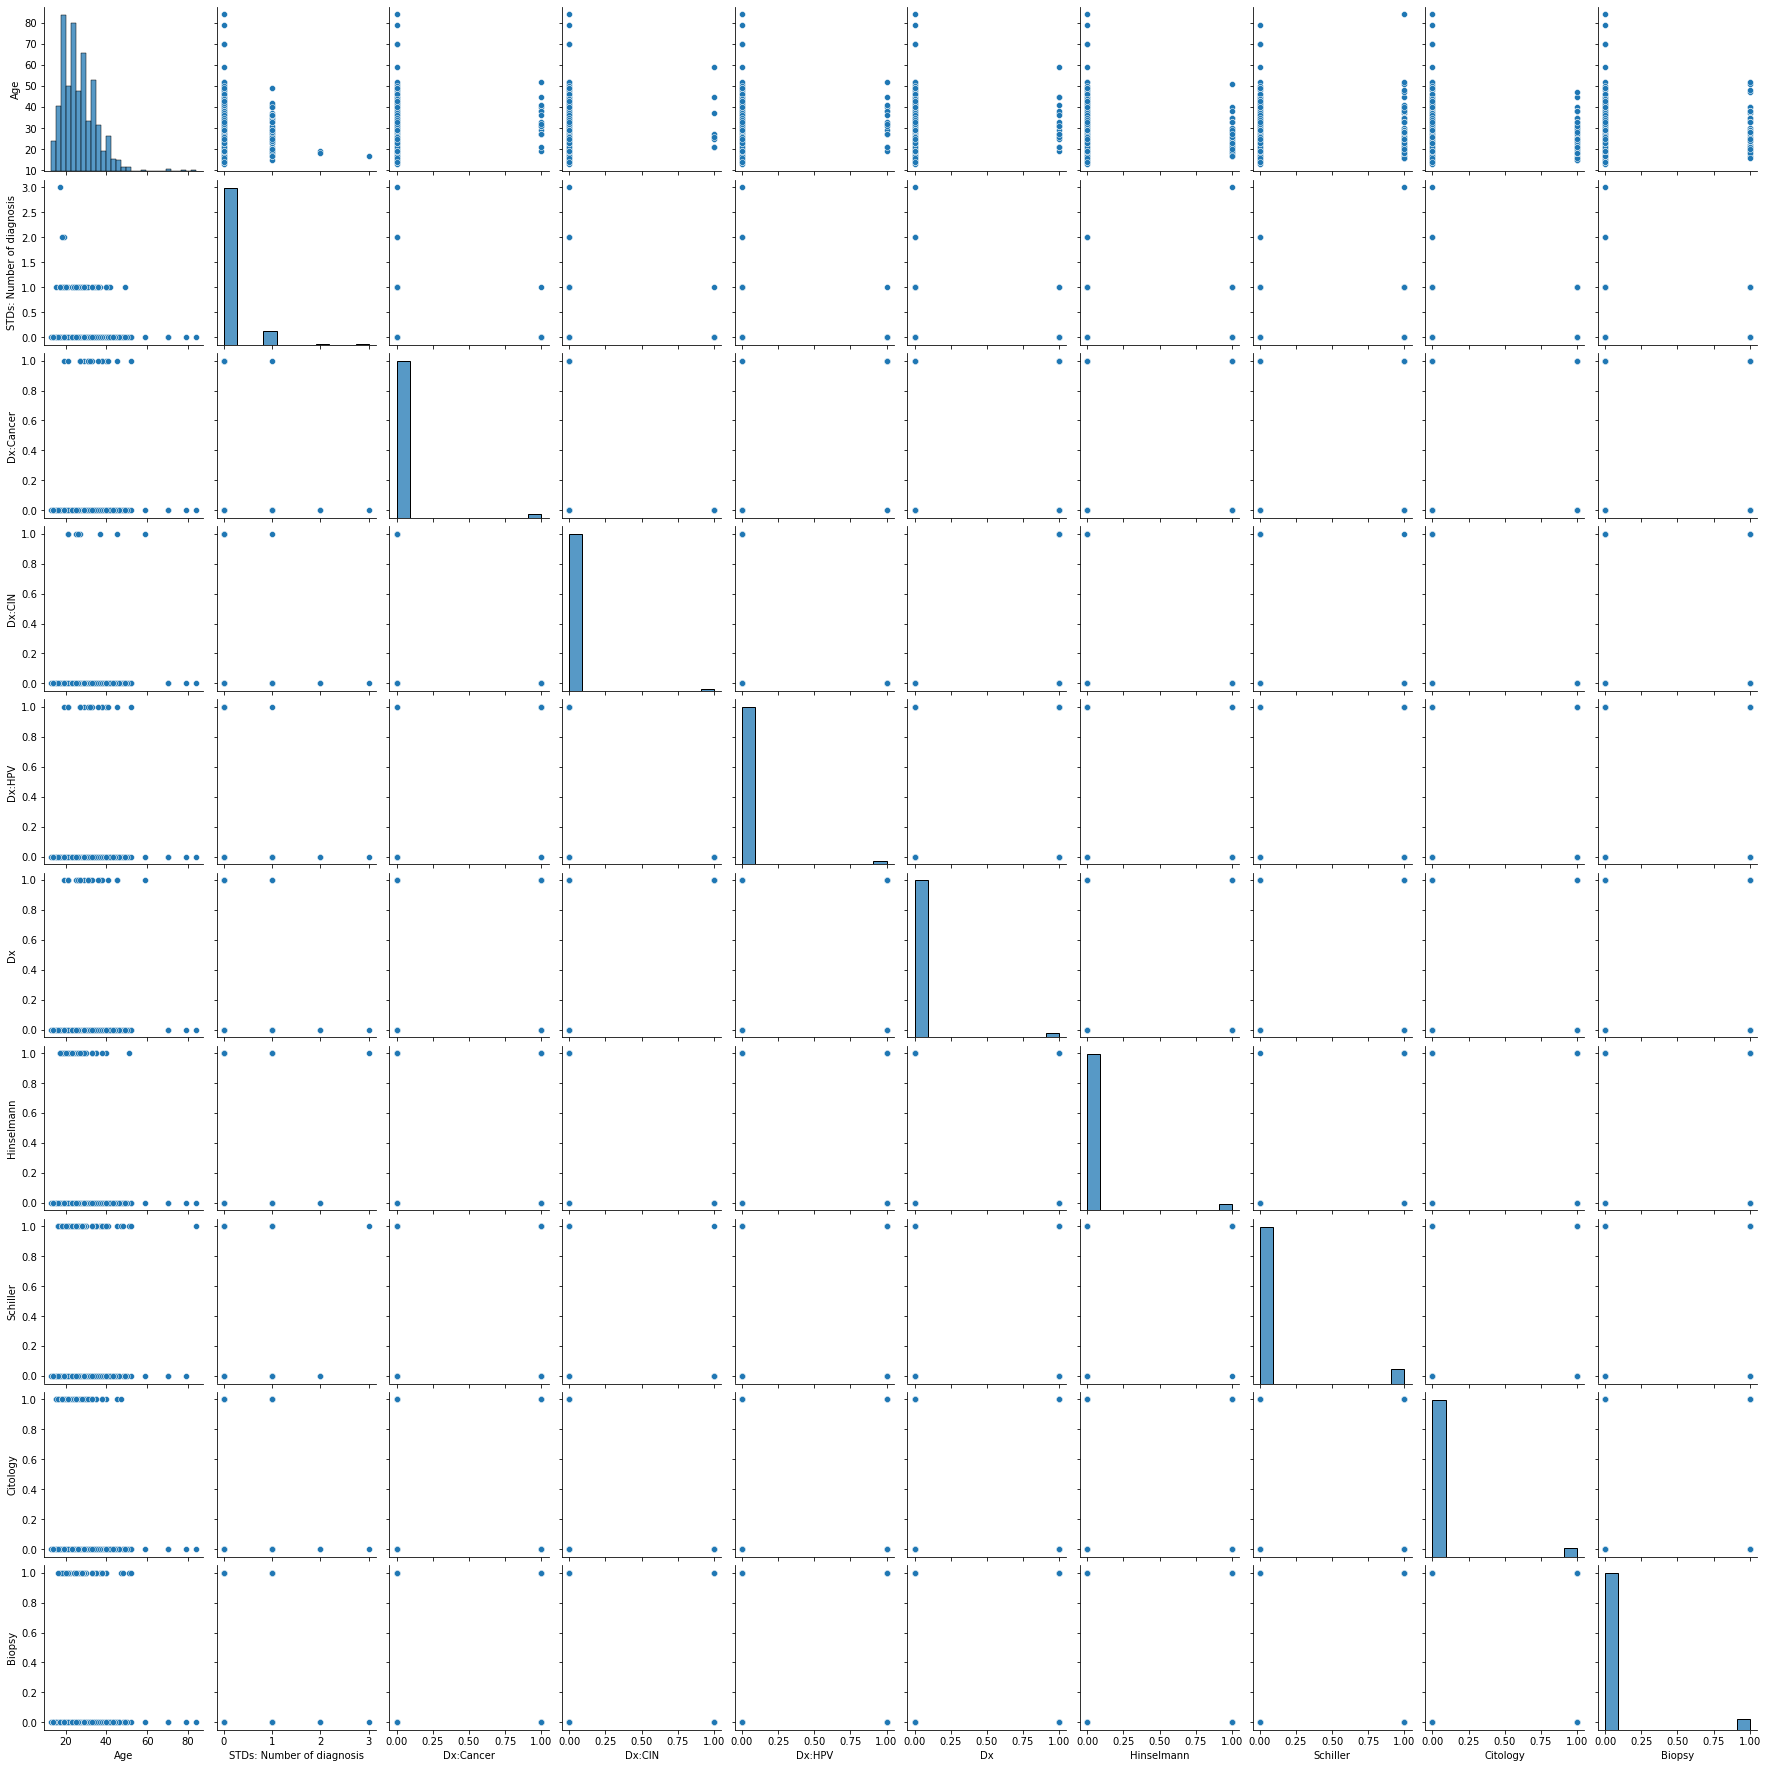

In [11]:
sns.pairplot(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

Some of the columns such as 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis contains many missing values. In this columns out of 858 total entries only 71 entries has a valid value
Imputing so many missing values make the model biased.

The feature column 'Biopsy' is our target variable. and all the other are 'independent variables'

Hence, this columns are removed from the dataset.

In [6]:
data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],
         axis = 'columns', inplace = True)

Below we can see all the columns(features) are present in the dataset.

In [7]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Duplicate entries in the dataset are of no use and can also make the model to overfit and give bad performance hence, they are removed.
After removal of missing columns and duplicate entries the dataset now has 835 entries and 35 feature columns.

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(835, 34)

In [10]:
data_numerical = data.select_dtypes(include = 'number')
data_numerical.dtypes

Age                          int64
STDs: Number of diagnosis    int64
Dx:Cancer                    int64
Dx:CIN                       int64
Dx:HPV                       int64
Dx                           int64
Hinselmann                   int64
Schiller                     int64
Citology                     int64
Biopsy                       int64
dtype: object

In [11]:
data_categorical = data.select_dtypes(include = 'object')
data_categorical1 = data_categorical.apply(pd.to_numeric)
data_categorical1.dtypes

Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                             float64
STDs:HIV                          

In [12]:
data = pd.concat([data_numerical,data_categorical1],axis = 1,join = 'inner')
data.head(10)

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,...,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
0,18,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,0,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51,0,0,0,0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,26,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,45,0,1,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,44,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4) Imputing the missing values 

The missing values are imputed in the following manner:
   If the feature is of numerical type then the missing values are imputed by 'mean' or 'median'. 'Median' is prefered more often.
   
   If the feature is of categorical type then the missing values are imputed by 'mode' the values are seen most frequent in that column.
   
   Imputation of Target variable is not advisable since it make the model learn from the biases. Removal of entire row is prefered in this case.
   
   
    

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[data_numerical.columns] = imputer.fit_transform(data[data_numerical.columns])

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data[data_categorical1.columns] = imputer.fit_transform(data[data_categorical1.columns])

In [15]:
data.isnull().sum()

Age                                   0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0
Schiller                              0
Citology                              0
Biopsy                                0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0


In [16]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,...,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000
mean,27.023952,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671,...,0.004790,0.051497,0.021557,0.001198,0.001198,0.001198,0.0,0.021557,0.001198,0.002395
std,8.482986,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091,...,0.069088,0.221142,0.145319,0.034606,0.034606,0.034606,0.0,0.145319,0.034606,0.048912
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


5) Treating the Outliers

The dataset can also contain outliers in the numerical datatypes columns. This values must be treated since this outliers can affect the predictions performed by the model.

In [17]:
numerical_columns=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
 'Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)']

The boxplots for the numerical columns below shows that it contains outliers and hence they are needed to be treated.

<AxesSubplot:>

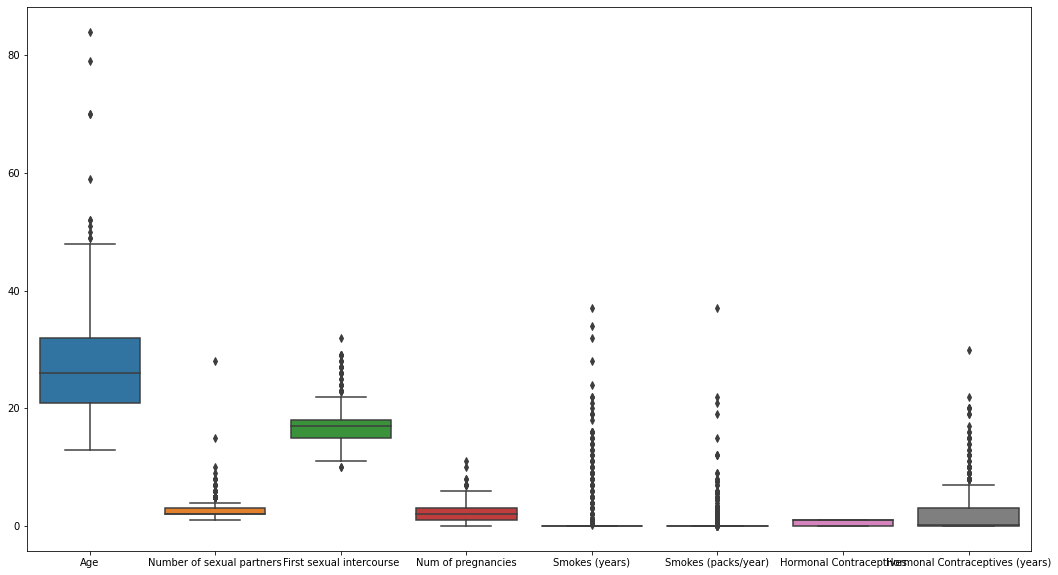

In [18]:
plt.figure(figsize = (18,10))
sns.boxplot(data=data[numerical_columns])



If the outlier value is less than the 25th quartile value then it is replaced by lower_limit which is equal to q1 - 1.5*iqr.


If the outlier value is greater than the  75th quartile value then it is replaced by upper_limit which is equal to q3 + 1.5*iqr.


where q1 = 25th quartile,
q3 = 75th quartile,
iqr = q3 -q1.

In [19]:
def cap_data(data):
    for col in numerical_columns:
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.25,0.75]).values
            iqr = percentiles[1]-percentiles[0]
            upper_limit = percentiles[1] + 1.5*iqr
            lower_limit = percentiles[0] -1.5*iqr
            data[col][data[col] <= percentiles[0]] = lower_limit
            data[col][data[col] >= percentiles[1]] = upper_limit
        else:
            data[col]=data[col]
    return data

cap_data(data)

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,...,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,48.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,48.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,48.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After the treatment of outliers, the boxplot below show that the numerical columns contains no outliers values.

<AxesSubplot:>

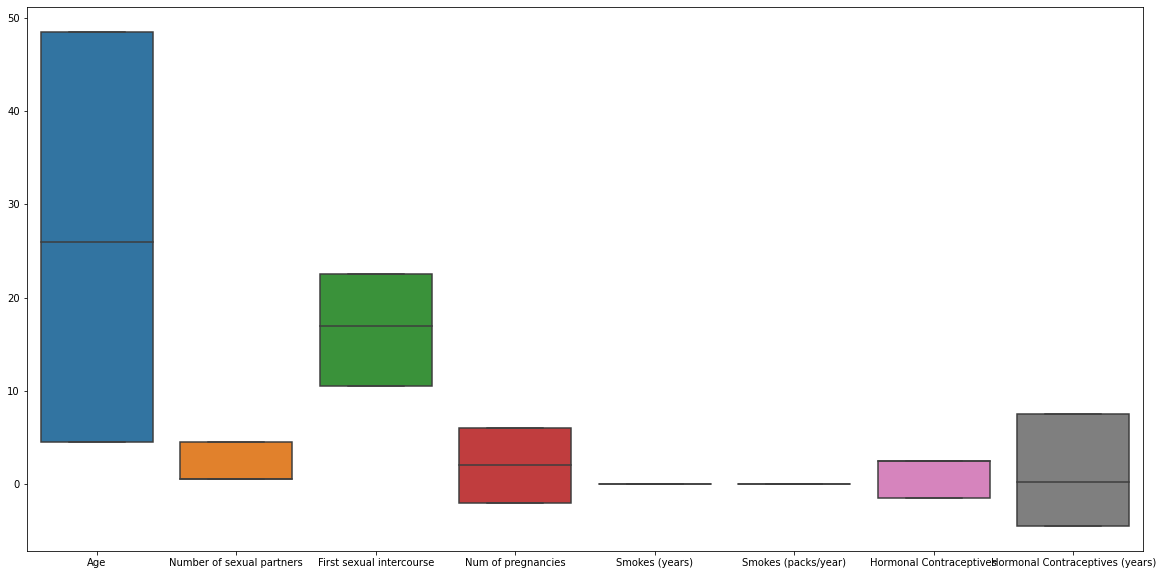

In [20]:
plt.figure(figsize = (20,10))
sns.boxplot(data=data[numerical_columns])


In [21]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,...,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000
mean,25.589222,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671,...,0.004790,0.051497,0.021557,0.001198,0.001198,0.001198,0.0,0.021557,0.001198,0.002395
std,16.664182,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091,...,0.069088,0.221142,0.145319,0.034606,0.034606,0.034606,0.0,0.145319,0.034606,0.048912
min,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,48.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,48.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


'Biopsy' is the target variable here,the value

0 represent there is no need no biopsy and person doesnt have cervical cancer


1 represent ther is need of biopsy meaning the person has high chances of cervical cancer

In [22]:
data['Biopsy'].value_counts()/len(data)

0.0    0.935329
1.0    0.064671
Name: Biopsy, dtype: float64

6) Dividing the dataset into independent and dependent(target variables)

In [23]:
x = data.drop(columns = ['Biopsy'])
y = data['Biopsy']

7) Scaling the Dataset


Different columns contains values in different range, if a column contain large values and other contains smaller values like between 0 to 1, the model learns more from the columns which has larger values and has very little or no affect of the columns with smaller values.

Hence, the datset is scaled and the all the values are scaled to a range of (0,1). Doing so all the independent columns have values in same range.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

8) Removing the multicollinearity

Some features are completely related to other independent features in the dataset. Such columns can be removed from the dataset.

for ex - if we have a radius column and area column, the area column is completely dependent on the radius values and hence it can be removed from the dataset.

In [25]:
corr_matrix = x.corr()
corr_matrix.head()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Number of sexual partners,...,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
Age,1.000000,-0.011554,0.093034,0.019637,0.088578,0.063421,-0.006324,0.074718,-0.015402,0.179359,...,0.023061,-0.022723,0.001928,0.047636,-0.043848,0.002933,NaN,0.010593,-0.043848,0.067408
STDs: Number of diagnosis,-0.011554,1.000000,-0.016613,0.007259,-0.016613,-0.003645,0.075276,0.130780,0.055537,0.027523,...,0.206263,0.692728,0.414347,0.102946,0.102946,0.102946,NaN,0.549022,0.102946,0.065649
Dx:Cancer,0.093034,-0.016613,1.000000,-0.015494,0.886441,0.665423,0.133550,0.158419,0.114660,0.040654,...,-0.010298,-0.034586,-0.022032,-0.005140,-0.005140,-0.005140,NaN,-0.022032,-0.005140,0.330117
Dx:CIN,0.019637,0.007259,-0.015494,1.000000,-0.015494,0.606787,-0.021833,0.008753,-0.024322,0.005093,...,-0.007242,-0.024322,-0.015494,-0.003614,-0.003614,-0.003614,NaN,0.064366,-0.003614,-0.005115
Dx:HPV,0.088578,-0.016613,0.886441,-0.015494,1.000000,0.616069,0.133550,0.158419,0.114660,0.023948,...,-0.010298,-0.034586,-0.022032,-0.005140,-0.005140,-0.005140,NaN,-0.022032,-0.005140,0.330117


If the correlation matrix show collinearity more than 0.5 then the column can be removed from the dataset.

Below is the visualisation of that collinearity.

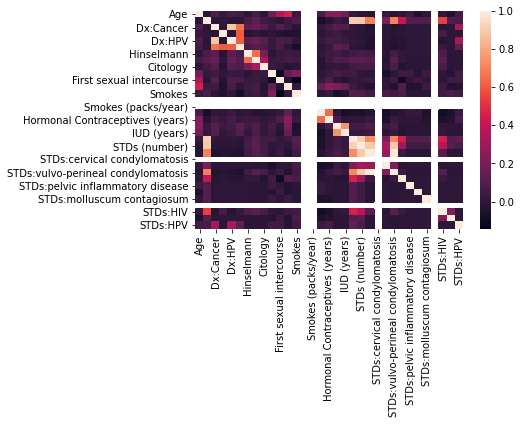

<Figure size 1500x1500 with 0 Axes>

In [26]:
sns.heatmap(corr_matrix)
plt.figure(figsize = (10,10),dpi = 150)
plt.show()

# Spliting the Dataset

The dataset is split into train set and test set.

The model learn on the train set and the performance of the model is validated using test set.

Train and test set are splitted into 7:3 or 8:2 ratio. 

In [27]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train,y_test = tts(scaled_x, y, train_size = 0.7,stratify = None)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((584, 33), (251, 33), (584,), (251,))

# Classification Models

1) Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [29]:
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

y_pred represents the values predicted by the model

In [30]:
y_pred = classifier.predict(x_test)
predicted_proba = classifier.predict_proba(x_test)

The below confusion matrix show the how well the model can predict the true possitive values while training.

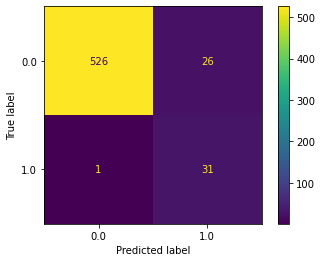

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_train,y_train)
plt.show()

The confusion matrix below show how well the model performs on the test set.

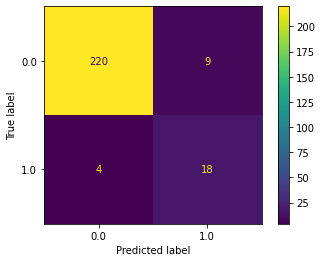

In [32]:
plot_confusion_matrix(classifier, x_test,y_test)
plt.show()

The performance of models build to predict the disease are validated on the basis of its recall score.
Recall score lies between 0 to 1. 1 is consider as best model and 0 as the worst model.


The model created by us has a recall value of 0.94 which is a very good score.

In [33]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred)
print(k)

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       229
         1.0       0.67      0.82      0.73        22

    accuracy                           0.95       251
   macro avg       0.82      0.89      0.85       251
weighted avg       0.95      0.95      0.95       251



In [34]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(y_test,
                                                                        predicted_proba[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((167,), (167,), (166,))

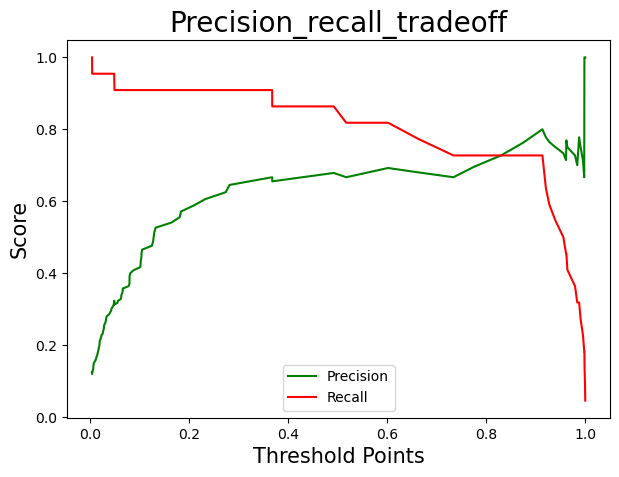

In [35]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(threshold_points,precision_points[:-1],color = 'green',label = 'Precision')
plt.plot(threshold_points, recall_points[:-1],color = 'red',label = 'Recall')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Precision_recall_tradeoff',fontsize = 20)
plt.legend()

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,predicted_proba[:,-1])

Below is the AOC-Roc curve for the logistic regression model. The values of AUC-ROC lies between 0 to 1. 1 being the best model and 0 being the worst.


The AOC- ROC curve represent how well the model predicts true possitive with respect to its false possitive rate.



The model created by us as AOC- ROC score of 0.96 which is a great score.

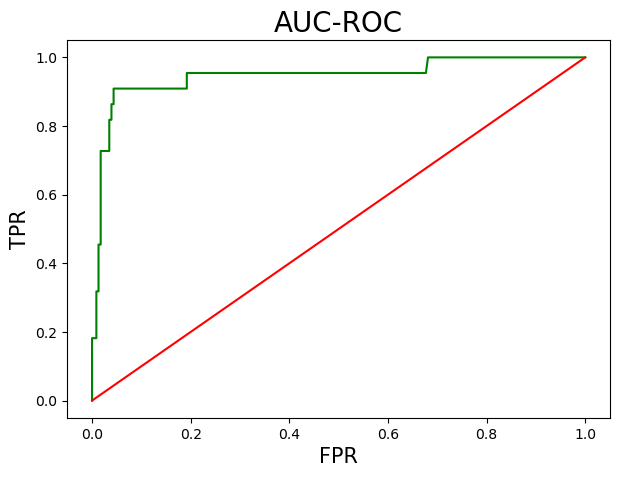

0.9457125843588726

In [37]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(fpr,tpr, color = 'green')
plt.plot([0,1],[0,1],label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test,predicted_proba[:,1])

The table below show the coefficients generated by the model for each independent variables.


In [38]:
c = classifier.coef_.reshape(-1)
x = x.columns
coeff_plot = pd.DataFrame({
    'coefficients':c,
    'variables':x,
    })
#sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variables
25,-0.862536,STDs:syphilis
0,-0.619734,Age
15,-0.264068,Hormonal Contraceptives
17,-0.248528,IUD
10,-0.228328,First sexual intercourse


The graph below shows how the target variables depends upon the independent variables used in building this model.

Text(0.5, 1.0, 'Coefficients plot')

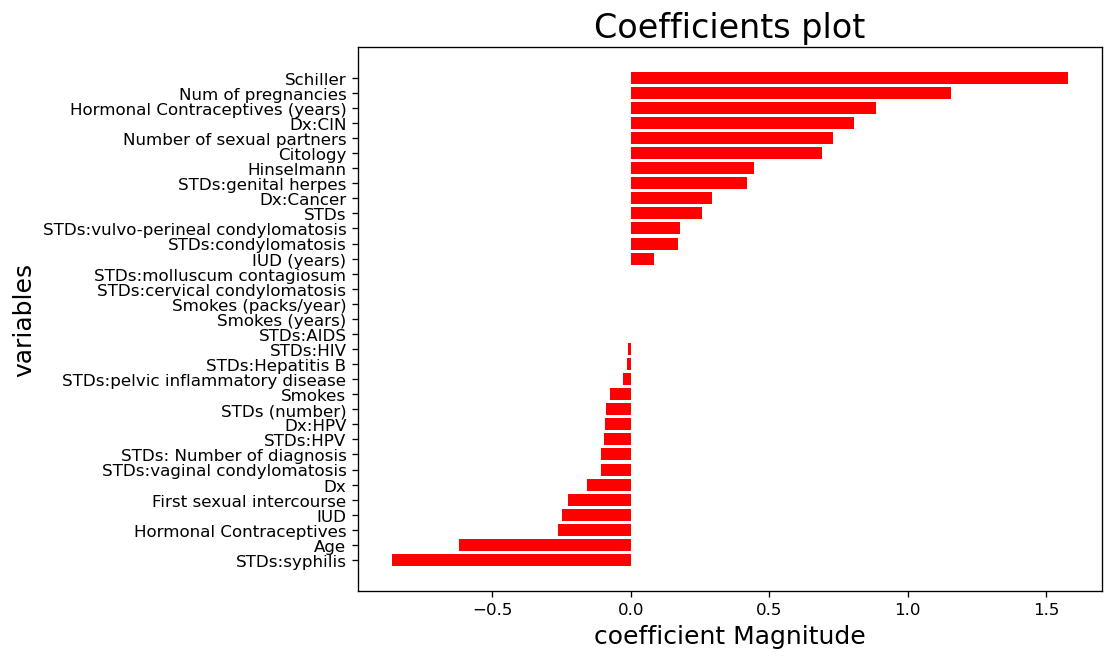

In [39]:
plt.figure(figsize = (8,6),dpi = 120)
plt.barh(coeff_plot['variables'],coeff_plot['coefficients'],color = 'red',)
plt.xlabel('coefficient Magnitude',fontsize = 15)
plt.ylabel('variables',fontsize = 15)
plt.title('Coefficients plot',fontsize = 20)

2) Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_features = 10, max_depth = 14)
dtc.fit(x_train,y_train)
y_pred2 = dtc.predict(x_test)

In [54]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred2)
print(k)

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       229
         1.0       0.54      0.32      0.40        22

    accuracy                           0.92       251
   macro avg       0.74      0.65      0.68       251
weighted avg       0.90      0.92      0.91       251



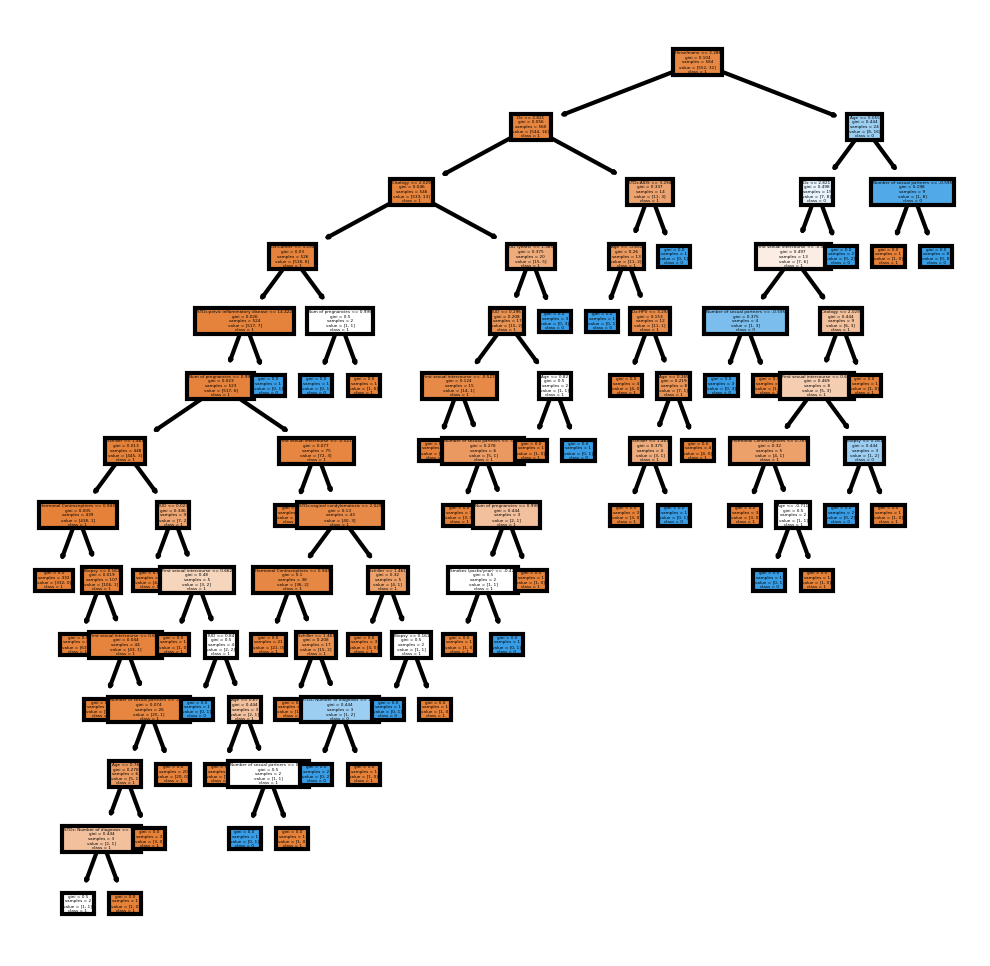

In [55]:
from sklearn import tree
fn = ['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy',
       'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV']
cn = ['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

3) K- Nearest Neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
  
knn.fit(x_train, y_train)

y_pred3 = knn.predict(x_test)

In [52]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred3)
print(k)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       229
         1.0       0.78      0.32      0.45        22

    accuracy                           0.93       251
   macro avg       0.86      0.65      0.71       251
weighted avg       0.92      0.93      0.92       251



plt.scatter(
    x_test['Age'],
    x_test['Num of pregnancies'],
    c=y_pred3,
    cmap='coolwarm',
    alpha=0.7
)

In [45]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

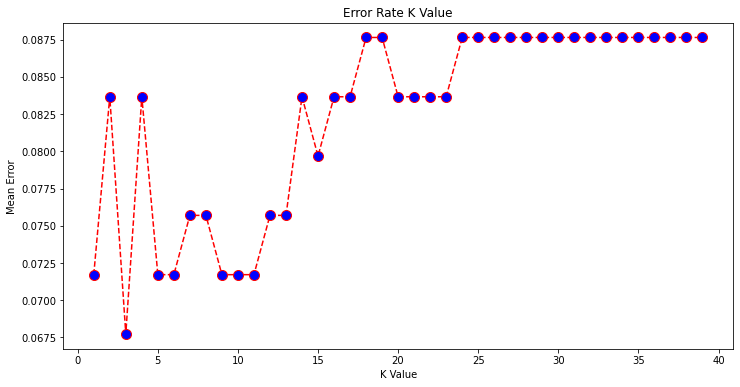

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

4) Support Vector Machine

In [47]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(x_train, y_train)
y_pred4 = svc_model.predict(x_test)

In [48]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred4)
print(k)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       229
         1.0       0.80      0.36      0.50        22

    accuracy                           0.94       251
   macro avg       0.87      0.68      0.73       251
weighted avg       0.93      0.94      0.93       251



5) Ensemble Models
Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
y_pred5 = rfc.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred5)
print(k)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       229
         1.0       0.70      0.32      0.44        22

    accuracy                           0.93       251
   macro avg       0.82      0.65      0.70       251
weighted avg       0.92      0.93      0.92       251



On comparing all these models it is found that the logistic regression model predicts most precisely with a recall score of (0.96,0.82)

I hope whoever is reviewing my submission will act mature and read or atleast look into the report before giving points as the previous reviewer did. I dont know whose anger he/she was taking out on my report,lol. Thank You